Data yang sudah bersih berhasil dimuat.
Bentuk data: (41188, 59)

Nama kolom dalam DataFrame:
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'duration_min', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_we

D:\ASAH\ML-LeadScoringPrediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model berhasil dilatih!

--- Hasil Evaluasi Model Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

          No       0.99      0.86      0.92      7310
         Yes       0.45      0.91      0.60       928

    accuracy                           0.86      8238
   macro avg       0.72      0.89      0.76      8238
weighted avg       0.93      0.86      0.88      8238


Confusion Matrix:


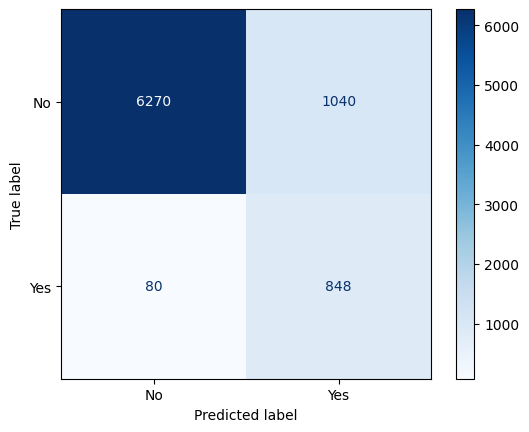

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Muat data yang SUDAH BERSIH dan SUDAH DI-ENCODE
# Pastikan Anda menggunakan separator yang benar saat menyimpan dan memuat.
# Jika Anda menyimpan dengan df.to_csv(..., index=False), pemisah defaultnya adalah koma (,)
try:
    file_path = r"D:\ASAH\ML-LeadScoringPrediction\data\bank_additional_cleaned.csv"
    df_cleaned = pd.read_csv(file_path) # Coba tanpa sep=';' terlebih dahulu
except Exception as e:
    print(f"Gagal memuat dengan pemisah koma, mencoba titik koma. Error: {e}")
    file_path = r"D:\ASAH\ML-LeadScoringPrediction\data\bank_additional_cleaned.csv"
    df_cleaned = pd.read_csv(file_path, sep=';')


print("Data yang sudah bersih berhasil dimuat.")
print("Bentuk data:", df_cleaned.shape)
df_cleaned.head()

# 2. Pisahkan Fitur (X) dan Target (y)
# Kolom target Anda sekarang kemungkinan bernama 'y_yes' atau 'y'
# Mari kita periksa nama kolomnya
print("\nNama kolom dalam DataFrame:")
print(df_cleaned.columns.tolist())

# TENTUKAN NAMA KOLOM TARGET ANDA DI SINI
# Jika hasil one-hot encoding dari 'y' menghasilkan 'y_no' dan 'y_yes',
# maka target kita adalah 'y_yes'. Jika Anda sudah map 'y' ke 0/1 sebelum menyimpan, namanya 'y'.
target_column = 'y_yes' # <-- GANTI INI JIKA NAMA KOLOM TARGET ANDA BERBEDA (misal: 'y')

# Verifikasi apakah kolom target ada
if target_column not in df_cleaned.columns:
    # Mungkin Anda sudah map 'y' menjadi 0/1 sebelum encoding dan menyimpannya.
    # Cek apakah kolom 'y' ada
    if 'y' in df_cleaned.columns:
        target_column = 'y'
    else:
        raise ValueError(f"Kolom target '{target_column}' tidak ditemukan di DataFrame. Periksa kembali nama kolomnya.")


X = df_cleaned.drop(columns=[target_column, 'y_no'], errors='ignore') # Hapus 'y_no' jika ada
y = df_cleaned[target_column]

# 3. Bagi Data menjadi Training dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Latih Model Baseline: Logistic Regression
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
print("\nMelatih model Logistic Regression...")
model_lr.fit(X_train, y_train)
print("Model berhasil dilatih!")

# 5. Buat prediksi dan Evaluasi
y_pred_lr = model_lr.predict(X_test)

print("\n--- Hasil Evaluasi Model Logistic Regression ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No', 'Yes']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


Melatih model Random Forest...
Model berhasil dilatih!

--- Hasil Evaluasi Model Random Forest ---
Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.98      0.95      7310
         Yes       0.69      0.44      0.54       928

    accuracy                           0.91      8238
   macro avg       0.81      0.71      0.74      8238
weighted avg       0.90      0.91      0.91      8238


Confusion Matrix:


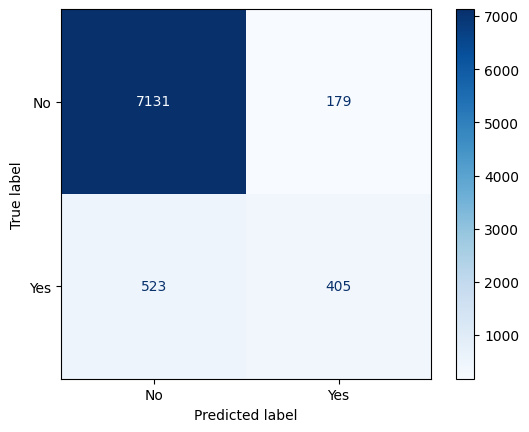

In [2]:
# --- Langkah Selanjutnya: Mencoba Model yang Lebih Kompleks ---
from sklearn.ensemble import RandomForestClassifier

# 1. Inisialisasi Model Random Forest
# n_estimators=100 -> jumlah "pohon" dalam "hutan"
# class_weight='balanced' -> tetap penting untuk imbalanced data
# n_jobs=-1 -> menggunakan semua core CPU untuk mempercepat pelatihan
# random_state=42 -> untuk reproducibility
model_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=42)

# 2. Latih model
print("\nMelatih model Random Forest...")
model_rf.fit(X_train, y_train)
print("Model berhasil dilatih!")

# 3. Buat prediksi dan evaluasi
y_pred_rf = model_rf.predict(X_test)

print("\n--- Hasil Evaluasi Model Random Forest ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No', 'Yes']))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No', 'Yes'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.show()

C:\Users\Besto\AppData\Local\Temp\ipykernel_3840\165921734.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
D:\ASAH\ML-LeadScoringPrediction\venv\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



Melatih model XGBoost...
Model berhasil dilatih!

--- Hasil Evaluasi Model XGBoost ---
Classification Report:
              precision    recall  f1-score   support

          No       0.98      0.89      0.93      7310
         Yes       0.50      0.86      0.63       928

    accuracy                           0.89      8238
   macro avg       0.74      0.88      0.78      8238
weighted avg       0.93      0.89      0.90      8238


Confusion Matrix:


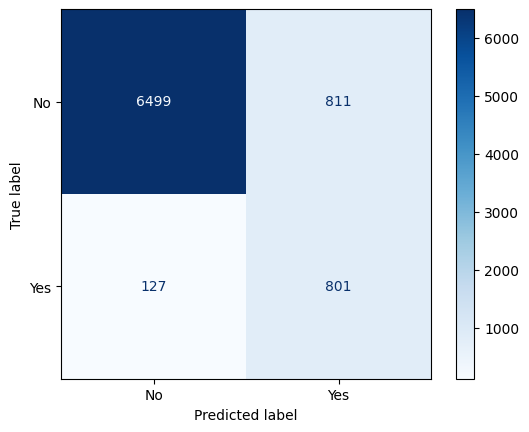

In [3]:
# --- Langkah Selanjutnya: Mencoba XGBoost ---
import xgboost as xgb

# 1. Inisialisasi Model XGBoost
# Karena data kita imbalanced, kita perlu menyesuaikan 'scale_pos_weight'
# Ini adalah cara XGBoost menangani class imbalance, mirip dengan class_weight
# Hitung scale_pos_weight = (jumlah sampel negatif) / (jumlah sampel positif)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    use_label_encoder=False, # Untuk menghindari warning
    eval_metric='logloss',
    random_state=42
)

# 2. Latih model
print("\nMelatih model XGBoost...")
model_xgb.fit(X_train, y_train)
print("Model berhasil dilatih!")

# 3. Buat prediksi dan evaluasi
y_pred_xgb = model_xgb.predict(X_test)

print("\n--- Hasil Evaluasi Model XGBoost ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No', 'Yes']))

print("\nConfusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No', 'Yes'])
disp_xgb.plot(cmap=plt.cm.Blues)
plt.show()

D:\ASAH\ML-LeadScoringPrediction\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Menghitung SHAP values...
SHAP values berhasil dihitung.

Menampilkan Global Feature Importance (SHAP Summary Plot)...


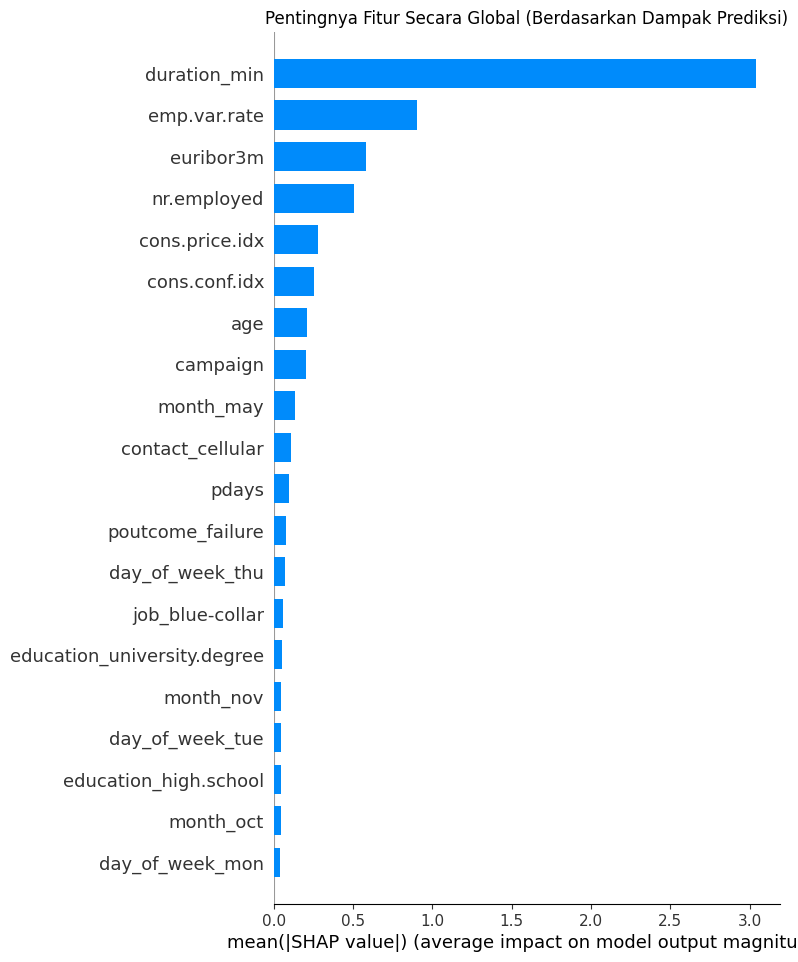


Menampilkan Dampak Detail Setiap Fitur...


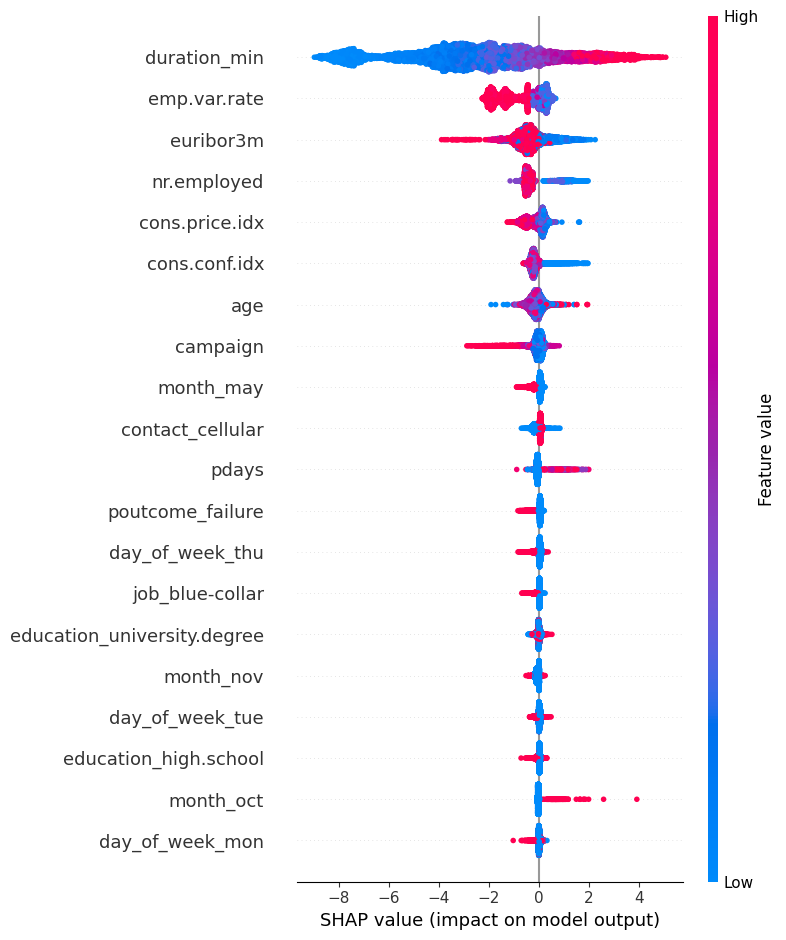

In [4]:
import shap

# --- Kode SHAP (seharusnya berfungsi setelah downgrade xgboost) ---

# 1. Buat SHAP TreeExplainer
explainer = shap.TreeExplainer(model_xgb)

# 2. Hitung SHAP values
print("\nMenghitung SHAP values...")
shap_values = explainer.shap_values(X_test)
print("SHAP values berhasil dihitung.")

# 3. Visualisasi Global Feature Importance (Bar Plot)
print("\nMenampilkan Global Feature Importance (SHAP Summary Plot)...")
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Pentingnya Fitur Secara Global (Berdasarkan Dampak Prediksi)")
plt.show()

# 4. Visualisasi Dampak Fitur (Summary Plot Detail)
print("\nMenampilkan Dampak Detail Setiap Fitur...")
shap.summary_plot(shap_values, X_test)

In [5]:
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter Tuning untuk XGBoost ---

print("Memulai proses Hyperparameter Tuning untuk XGBoost...")

# 1. Tentukan parameter grid yang ingin diuji
# Kita mulai dengan grid yang kecil agar tidak terlalu lama
param_grid = {
    'max_depth': [3, 5, 7],         # Kedalaman maksimum pohon
    'learning_rate': [0.01, 0.1],     # Seberapa cepat model belajar
    'n_estimators': [100, 200],       # Jumlah pohon dalam model
    'gamma': [0, 0.1]               # Regularisasi untuk mencegah overfitting
}

# Ambil nilai scale_pos_weight yang sudah kita hitung sebelumnya
counts = y_train.value_counts()
scale_pos_weight = counts.iloc[0] / counts.iloc[1]


# 2. Inisialisasi model XGBoost dasar
# Parameter yang tidak di-tuning kita set di sini
xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)


# 3. Inisialisasi GridSearchCV
# - estimator: model dasar yang akan di-tuning
# - param_grid: parameter yang akan diuji
# - scoring='f1': metrik yang jadi acuan untuk memilih model terbaik (kita fokus pada F1-score kelas 'Yes')
# - cv=3: Cross-validation 3-fold. Data training akan dibagi 3, dilatih 2/3, diuji 1/3, diulang 3 kali.
# - verbose=2: Menampilkan log proses agar kita tahu progresnya
# - n_jobs=-1: Menggunakan semua core CPU untuk mempercepat proses
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1
)

print("GridSearchCV berhasil diinisialisasi. Memulai pencarian parameter terbaik...")

Memulai proses Hyperparameter Tuning untuk XGBoost...
GridSearchCV berhasil diinisialisasi. Memulai pencarian parameter terbaik...


In [6]:
# 4. Lakukan pencarian pada data training
# Ini akan melatih model sebanyak: 3*2*2*2 (kombinasi) * 3 (cv) = 72 model
grid_search.fit(X_train, y_train)

print("\nProses Hyperparameter Tuning Selesai!")

Fitting 3 folds for each of 24 candidates, totalling 72 fits

Proses Hyperparameter Tuning Selesai!


In [7]:
# 5. Tampilkan parameter terbaik yang ditemukan
print("Parameter terbaik yang ditemukan:")
print(grid_search.best_params_)

# 6. Ambil model terbaik
best_xgb_tuned = grid_search.best_estimator_

# 7. Buat prediksi menggunakan model terbaik yang sudah di-tuning
y_pred_best_xgb = best_xgb_tuned.predict(X_test)

# 8. Tampilkan Classification Report untuk model yang sudah di-tuning
print("\n--- Hasil Evaluasi Model XGBoost (Setelah Tuning) ---")
print(classification_report(y_test, y_pred_best_xgb, target_names=['No', 'Yes']))

# 9. Hitung akurasi juga
accuracy_tuned = accuracy_score(y_test, y_pred_best_xgb)
print(f"Akurasi model XGBoost (Setelah Tuning): {accuracy_tuned:.4f}")

Parameter terbaik yang ditemukan:
{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

--- Hasil Evaluasi Model XGBoost (Setelah Tuning) ---
              precision    recall  f1-score   support

          No       0.98      0.89      0.93      7310
         Yes       0.50      0.88      0.64       928

    accuracy                           0.89      8238
   macro avg       0.74      0.89      0.79      8238
weighted avg       0.93      0.89      0.90      8238

Akurasi model XGBoost (Setelah Tuning): 0.8886


In [8]:
from sklearn.metrics import accuracy_score

print("--- Ringkasan Akurasi Final ---\n")

# 1. Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Model: Logistic Regression")
print(f"Akurasi: {accuracy_lr:.4f} ({accuracy_lr * 100:.2f}%)\n")

# 2. Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Model: Random Forest")
print(f"Akurasi: {accuracy_rf:.4f} ({accuracy_rf * 100:.2f}%)\n")

# 3. XGBoost (Default)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Model: XGBoost (Default)")
print(f"Akurasi: {accuracy_xgb:.4f} ({accuracy_xgb * 100:.2f}%)\n")

# 4. XGBoost (Tuned)
# Variabel y_pred_best_xgb dan accuracy_tuned sudah dihitung di sel sebelumnya
print(f"Model: XGBoost (Tuned)")
print(f"Akurasi: {accuracy_tuned:.4f} ({accuracy_tuned * 100:.2f}%)")
print("\n--- Selesai ---")

--- Ringkasan Akurasi Final ---

Model: Logistic Regression
Akurasi: 0.8640 (86.40%)

Model: Random Forest
Akurasi: 0.9148 (91.48%)

Model: XGBoost (Default)
Akurasi: 0.8861 (88.61%)

Model: XGBoost (Tuned)
Akurasi: 0.8886 (88.86%)

--- Selesai ---


In [9]:
import pickle
import os

print("\n--- Memulai Proses Penyimpanan Model ---\n")

# Direktori untuk menyimpan model
model_directory = '../models/models_V1'
os.makedirs(model_directory, exist_ok=True) 

# 1. Simpan model Logistic Regression
lr_filename = os.path.join(model_directory, 'logistic_regression_v1.pkl')
with open(lr_filename, 'wb') as file:
    pickle.dump(model_lr, file)
print(f"Model Logistic Regression berhasil disimpan di: {lr_filename}")

# 2. Simpan model Random Forest
rf_filename = os.path.join(model_directory, 'random_forest_v1.pkl')
with open(rf_filename, 'wb') as file:
    pickle.dump(model_rf, file)
print(f"Model Random Forest berhasil disimpan di: {rf_filename}")

# 3. Simpan model XGBoost (Default)
xgb_filename = os.path.join(model_directory, 'xgboost_model_v1.pkl')
with open(xgb_filename, 'wb') as file:
    pickle.dump(model_xgb, file)
print(f"Model XGBoost (Default) berhasil disimpan di: {xgb_filename}")

# 4. Simpan model XGBoost (Tuned) - INI YANG TERPENTING
tuned_xgb_filename = os.path.join(model_directory, 'xgboost_tuned_v1.pkl')
with open(tuned_xgb_filename, 'wb') as file:
    pickle.dump(best_xgb_tuned, file) # Pastikan menggunakan variabel best_xgb_tuned
print(f"Model XGBoost (Tuned) berhasil disimpan di: {tuned_xgb_filename}")

print("\n--- Semua model berhasil disimpan! ---")


--- Memulai Proses Penyimpanan Model ---

Model Logistic Regression berhasil disimpan di: ../models/models_V1\logistic_regression_v1.pkl
Model Random Forest berhasil disimpan di: ../models/models_V1\random_forest_v1.pkl
Model XGBoost (Default) berhasil disimpan di: ../models/models_V1\xgboost_model_v1.pkl
Model XGBoost (Tuned) berhasil disimpan di: ../models/models_V1\xgboost_tuned_v1.pkl

--- Semua model berhasil disimpan! ---
